In [1]:
import pandas as pd

cho_df = pd.read_csv('./data/cho.txt', sep='\t', header=None)
iyer_df = pd.read_csv('./data/iyer.txt', sep='\t', header=None)

cho_labels = cho_df.iloc[:, 1]
cho_df = cho_df.iloc[:, 2:]

iyer_labels = iyer_df.iloc[:, 1]
iyer_df = iyer_df.iloc[:, 1:]

print('cho labels:', len(cho_labels.unique()))
print('iyer labels:', len(iyer_labels.unique()))

cho labels: 5
iyer labels: 11


cho labels: 5


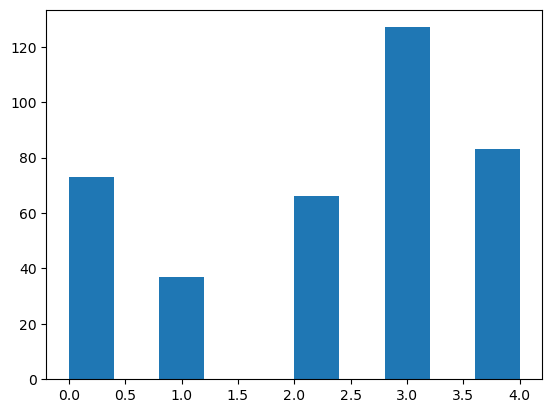

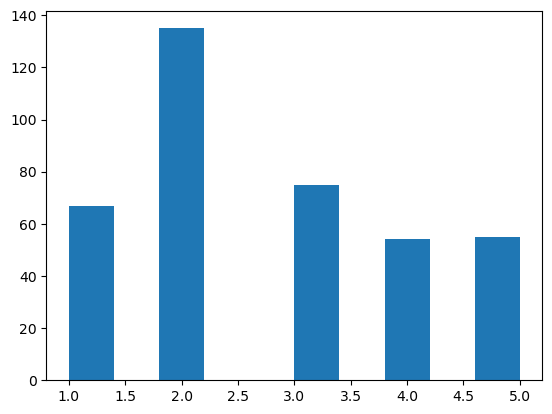

In [2]:
from lib.kmeans import Kmeans
import numpy as np
import matplotlib.pyplot as plt

k_means_cho = Kmeans(5, cho_df.to_numpy())
k_means_cho.run()
labels_cho = pd.DataFrame(k_means_cho.labels, columns=['Cluster ID'])
result_cho = pd.concat((cho_df,labels_cho), axis=1)

# show results distribution
plt.hist(result_cho['Cluster ID'])
plt.show()

# show ground truth distribution
plt.hist(cho_labels)
plt.show()

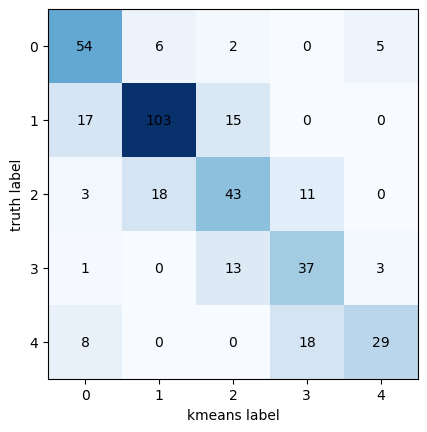

In [3]:
from sklearn.metrics import confusion_matrix

k_labels = labels_cho['Cluster ID']
k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(cho_labels==t)) for t in np.unique(cho_labels)]
    k_labels_matched[k_labels==k] = np.unique(cho_labels)[np.argmax(match_nums)]

cm = confusion_matrix(cho_labels, k_labels_matched)

plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [4]:
# compute accuracy
print('cho accuracy:', np.sum(k_labels_matched == cho_labels) / len(cho_labels))

cho accuracy: 0.689119170984456
